In [114]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import json
import pprint
import gzip
import zipfile
import os

In [ ]:
def helper(S):
  if S=="No Delay":
    return 0
  lis = S.split()
  if len(lis)==2:
    if lis[0][-1]=='M':
      return (int(lis[0][:-1]))
    if lis[0][-1]=='H':
      return (int(lis[0][:-1])*60)
  elif len(lis)==3:
    return (int(lis[0][:-1])*60 + int(lis[1][:-1]))

In [ ]:
import csv
StnCodeDist={}
with open('/content/drive/MyDrive/station_metadata.csv') as csv_file:
    reader = csv.reader(csv_file, delimiter=',')
    rows = list(reader)
    print(rows)
for i in rows:
  if i[1] not in StnCodeDist:
      StnCodeDist[i[1]]=i[7]

[['', 'Station Code', 'Station Name', 'Station Traffic', 'Station Degree', 'Category', 'Tehsil', 'District', 'State', 'Pin Code', 'Latitude', 'Longitude'], ['0', 'AABH', 'AMBIKA BHAWA', '4', '2', 'F', 'DIGHWARA', 'SARAN', 'BIHAR', '841101', '25.7408148', '84.9643091'], ['1', 'AADR', 'AMB  ANDAURA', '8', '1', 'E', 'AMB ANDAURA', 'UNA', 'HIMACHAL PRADESH', '177203', '31.6704872', '76.1104491'], ['2', 'AAG', 'ANGAR', '4', '2', 'E', 'MOHOL', 'SOLAPUR', 'MAHARASHTRA', '413214', '17.898833', '75.5771573'], ['3', 'AAH', 'ITEHAR', '6', '2', 'F', 'BHIND', 'BHIND', 'MADHYA PRADESH', '477001', '26.5619396', '78.671942'], ['4', 'AAL', 'AMLAI', '24', '2', 'D', 'ANUPPUR', 'ANUPPUR', 'MADHYA PRADESH', '484220', '23.1727986', '81.59370179999999'], ['5', 'AAM', 'ANGADIPURAM', '14', '2', 'D', 'PERINTHALMANNA', 'MALAPPURAM', 'KERALA', '679321', '10.977336', '76.20139309999999'], ['6', 'AAP', 'AMBIAPUR', '8', '2', 'E', 'DERA PUR', 'KANPUR DEHAT', 'UTTAR PRADESH', '209303', '26.4206233', '79.79465119999999

In [ ]:
#average delay per district
import pprint
from collections import defaultdict

i = 0
for file in os.listdir('/content/drive/MyDrive/merged_train_data'):
  if file != '78013.json':
    print(file)
    trainno = file.split('.')[0]
    if not trainno.isdigit():
      continue
    with open('/content/drive/MyDrive/merged_train_data/'+file) as f:
      data = json.loads(f.read())
    for key,value in data.items():
      # print(value)
      if key.isdecimal():
        # month=int(key[-4]+key[-3])
        for lis in value:
          if lis[4]!="No Record":
            if lis[1] in StnCodeDist: 
              dist=StnCodeDist[lis[1]]
              if dist in delay_district:
                delay_district[dist].append(helper(lis[4]))
              else:
                delay_district[dist]=[helper(lis[4])]
  i+=1
  if i>200:
    break 

203


In [ ]:
#average delay per district
import pprint
from collections import defaultdict
mean_delays = np.zeros(12,dtype=float)
delay_district={}
i = 0
for file in os.listdir('/content/drive/MyDrive/merged_train_data'):
  if file != '78013.json':
    print(file)
    trainno = file.split('.')[0]
    if not trainno.isdigit():
      continue
    with open('/content/drive/MyDrive/merged_train_data/'+file) as f:
      data = json.loads(f.read())
    for key,value in data.items():
      # print(value)
      if key.isdecimal():
        # month=int(key[-4]+key[-3])
        for lis in value:
          if lis[4]!="No Record":
            if lis[1] in StnCodeDist: 
              dist=StnCodeDist[lis[1]]
              if dist in delay_district:
                delay_district[dist].append(helper(lis[4]))
              else:
                delay_district[dist]=[helper(lis[4])]
  i+=1
  if i>200:
    break 

In [ ]:
avg_delay_dist={}
for i in delay_district:
  avg=sum(delay_district[i]) / len(delay_district[i]) 
  avg_delay_dist[i]=avg
# pprint.pprint(avg_delay_dist)


In [ ]:
#monthly delay
import pprint
from collections import defaultdict
mean_delays = np.zeros(12,dtype=float)
monthly={}
for i in range(1,13):
  monthly[i]=[0,0]
i = 0
for file in os.listdir('/content/drive/MyDrive/merged_train_data'):
  if file != '78013.json':
    # print(file)
    trainno = file.split('.')[0]
    if not trainno.isdigit():
      continue
    with open('/content/drive/MyDrive/merged_train_data/'+file) as f:
      data = json.loads(f.read())
    for key,value in data.items():
      if key.isdecimal():
        month=int(key[-4]+key[-3])
        for lis in value:
          if lis[4]!="No Record":
            delay = helper(lis[4])
            monthly[month][0]+=delay
            monthly[month][1]+=1
  i+=1
  # print(i,end=" ")
  if i%100==0:
    print(i)
  if i>6000:
    break
average_monthly=[]
for i in monthly:
  average_monthly.append(monthly[i][0]/monthly[i][1])
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
x = [i for i in range(12)]
plt.plot(x, average_monthly, linestyle='solid', label='S')
plt.show()

51.16003582736623 35.75880892566869 45.65097781764448 49.050014977464805


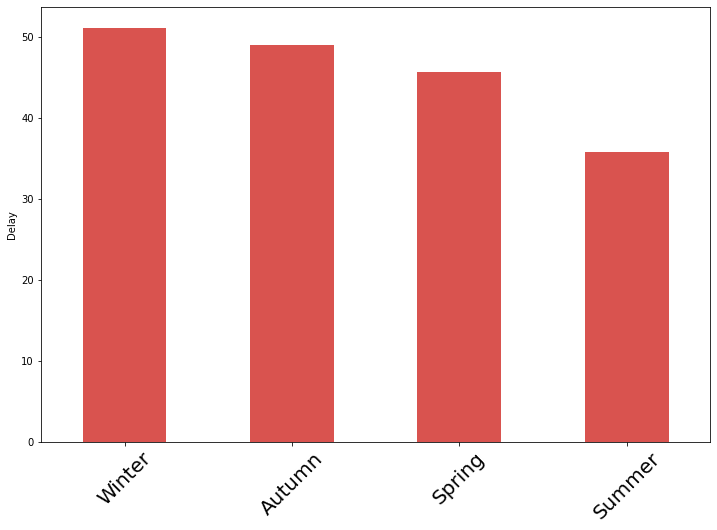

In [ ]:
#season wise bar graph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
winter=(monthly[12][0]+monthly[1][0]+monthly[2][0])/(monthly[12][1]+monthly[1][1]+monthly[2][1])
summer=(monthly[6][0]+monthly[7][0]+monthly[8][0])/(monthly[6][1]+monthly[7][1]+monthly[8][1])
spring=(monthly[3][0]+monthly[4][0]+monthly[5][0])/(monthly[3][1]+monthly[4][1]+monthly[5][1])
autumn=(monthly[9][0]+monthly[10][0]+monthly[11][0])/(monthly[9][1]+monthly[10][1]+monthly[11][1])
print(winter,summer,spring,autumn)
frequencies = [winter,autumn,spring,summer]
# In my original code I create a series and run on that, 
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = ['Winter','Autumn','Spring','Summer']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar',color='#d9534f')
# ax.set_title('Amount Frequency')
# ax.set_xlabel('Season')
ax.set_ylabel('Delay')
ax.tick_params(axis='x', which='major', labelsize=20)
ax.set_xticklabels(x_labels,rotation=45)

rects = ax.patches
plt.show()
# Make some labels.
# labels = ["label%d" % i for i in xrange(len(rects))]

# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
#             ha='center', va='bottom')

In [ ]:
holidays =[]
for year in range(2018,2020):
  holidayscsv = pd.read_csv('/content/drive/MyDrive/'+str(year)+'.csv')
  for date in holidayscsv['date']:
    date = ''.join(date.split('-'))
    holidays.append(date)

300


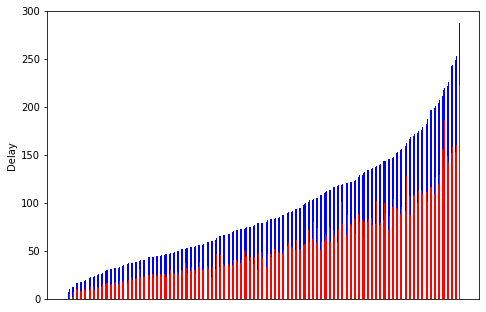

In [ ]:
#average delay distric-wise with and without holiday
# import pprint
from collections import defaultdict
mean_delays = np.zeros(12,dtype=float)
delay_district_holiday={}
delay_district_nonHoliday={}
i = 0
for file in os.listdir('/content/drive/MyDrive/merged_train_data'):
  if file != '78013.json':
    # print(file)
    trainno = file.split('.')[0]
    if not trainno.isdigit():
      continue
    with open('/content/drive/MyDrive/merged_train_data/'+file) as f:
      data = json.loads(f.read())
    for key,value in data.items():
      # print(value)
      if key.isdecimal():
        if key not in holidays:
          for lis in value:
            if lis[4]!="No Record":
              if lis[1] in StnCodeDist: 
                dist=StnCodeDist[lis[1]]
                if dist in delay_district_nonHoliday:
                  delay_district_nonHoliday[dist].append(helper(lis[4]))
                else:
                  delay_district_nonHoliday[dist]=[helper(lis[4])]
                # print(helper(lis[4]))
        elif key in holidays:
          for lis in value:
            if lis[4]!="No Record":
              if lis[1] in StnCodeDist: 
                dist=StnCodeDist[lis[1]]
                if dist in delay_district_holiday:
                  delay_district_holiday[dist].append(helper(lis[4]))
                else:
                  delay_district_holiday[dist]=[helper(lis[4])]
  i+=1
  if i>500:
    break 
avg_delay_dist_holiday={}
for i in delay_district_holiday:
  if i in delay_district_nonHoliday:
    avg1=sum(delay_district_holiday[i]) / len(delay_district_holiday[i]) 
    avg2=sum(delay_district_nonHoliday[i]) / len(delay_district_nonHoliday[i]) 
    avg_delay_dist_holiday[i]=[avg1,avg2]
list_avg_holidays=[]
for i in avg_delay_dist_holiday:
  list_avg_holidays.append([i,avg_delay_dist_holiday[i][0],avg_delay_dist_holiday[i][1]])
#plot district wise 
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
N=len(list_avg_holidays)
import numpy as np
import matplotlib.pyplot as plt
res2 = [i for i in list_avg_holidays if i[2]<100]
res2=res2[:300]
print(len(res2))
res2.sort(key=lambda x: x[1]+x[2])
N = len(res2)
holidayMeans = [i[1] for i in res2]
nonholidayMeans = [i[2] for i in res2]
ind = [i[0] for i in res2] # the x locations for the groups
width = 0.5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, holidayMeans, width, color='r')
ax.bar(ind, nonholidayMeans, width,bottom=holidayMeans, color='b')
ax.set_ylabel('Delay')
ax.set_xlabel('Districts')
plt.ylim((0,300))
ax.xaxis.set_visible(False)
plt.savefig('1.png')
plt.show()

In [ ]:
import pprint
from collections import defaultdict
mean_delays = {}
i = 0
for file in os.listdir('/content/drive/MyDrive/merged_train_data'):
  print(file)
  trainno = file.split('.')[0]
  if not trainno.isdigit():
    continue
  with open('/content/drive/MyDrive/merged_train_data/'+file) as f:
    data = json.loads(f.read())
  stationlist = []
  for key,value in data.items():
    for lis in value:
      stationlist.append((lis[0],lis[1]))
    break;
  temp = defaultdict(int)
  # for name,code in stationlist:
  #   temp[name]=0
  ####################
  max_delay = 0
  max_delay_date = ''
  max_delay_station = ''
  #####################
  for key,value in data.items():
    for lis in value:
      if lis[4]!="No Record":
        delay = helper(lis[4])
        if max_delay < delay:
          max_delay = delay
          max_delay_date = key
          max_delay_station = lis[0]
        temp[lis[0]] += delay
  for key,value in temp.items():
    temp[key]= value/len(data)
  print(temp)
  if len(temp)==0:
    continue
  temp['max_delay'] = max_delay
  temp['max_delay_date'] = max_delay_date
  temp['max_delay_station'] = max_delay_station
  mean_delays[trainno] = temp
  i += 1
  if i>0:
    break
  #break;
# print(stationlist)
pprint.pprint(mean_delays)
# print(temp,max_delay,max_delay_date,max_delay_station)

51754.json
defaultdict(<class 'int'>, {'Paradol': 10.087533156498674, 'Manendragarh': 7.480106100795756, 'Boridand': 12.785145888594165, 'Bijuri': 8.904509283819628, 'Baihatola': 13.519893899204243, 'Kotma': 12.957559681697612, 'Harrad': 14.872679045092838, 'Mauhari': 16.19628647214854, 'Anuppur': 11.193633952254642, 'Amlai': 19.413793103448278, 'Burhar': 26.416445623342174, 'Singhpur': 23.681697612732094, 'Shahdol': 13.076923076923077, 'Birsinghpur': 30.70557029177719, 'Nowrozabad': 34.55968169761273, 'Karkeli': 37.3368700265252, 'Umaria': 39.01856763925729, 'Chandia Road': 50.55437665782493, 'Rupaund': 39.96551724137931, 'Katni': 8.442970822281167, 'Jukehi': 18.336870026525197, 'Amdara': 19.615384615384617, 'Maihar': 23.039787798408486, 'Unchhera': 25.575596816976127, 'Satna': 10.628647214854112, 'Bagahai Road': 9.092838196286472, 'Rewa': 6.177718832891247, 'Turki Road': 9.079575596816976, 'Chirmiri': 9.47214854111406, 'Dhurwasin P H': 0.4960212201591512})
{'51754': defaultdict(<clas

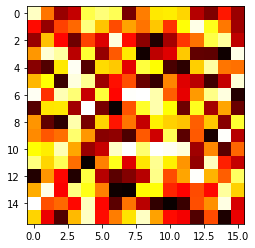

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()